In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Matmul FLOP
label = 'matmul'
df = pd.read_csv('data/sac_find_best_matmul.csv')
flop = df['size'] * df['size'] * (2 * df['size'] - 1)

# N-body FLOP
#label = 'n-body'
#df = pd.read_csv('data/sac_find_best_nbody.csv')
#flop = 20 * df['size'] * df['size'] + 12 * df['size']

# 9-point stencil FLOP
#label = 'stencil'
#df = pd.read_csv('data/sac_find_best_relax.csv')
#flop = 17 * df['size'] * df['size']

df['GFLOP/J'] = (flop / 1e9) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['GFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

df

,pin,size,threads,runtime,runtimesd,energy,energysd,name,GFLOP/J,GFLOP/s,GFLOP/J SD
0,True,500,1,0.154082,0.000140,2.306294,0.022143,NaN,0.108291,1.620891,0.0
1,True,500,2,0.156765,0.002517,2.487459,0.038289,NaN,0.100404,1.593152,0.0
2,True,500,3,0.103119,0.001857,1.979263,0.037256,NaN,0.126183,2.421958,0.0
3,True,500,4,0.078404,0.002274,1.571968,0.049967,NaN,0.158877,3.185432,0.0
4,True,500,5,0.062259,0.002698,1.452594,0.073693,NaN,0.171934,4.011457,0.0
...,...,...,...,...,...,...,...,...,...,...,...
347,False,1500,12,2.926756,0.027619,88.687538,1.121223,NaN,0.076085,2.305539,0.0
348,False,1500,13,2.729328,0.013467,90.776260,0.472311,NaN,0.074334,2.472312,0.0
349,False,1500,14,2.517728,0.024157,85.200401,1.005796,NaN,0.079199,2.680095,0.0
350,False,1500,15,2.345695,0.021994,86.644012,0.550490,NaN,0.077879,2.876653,0.0


In [3]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=[x+1 for x in x], y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

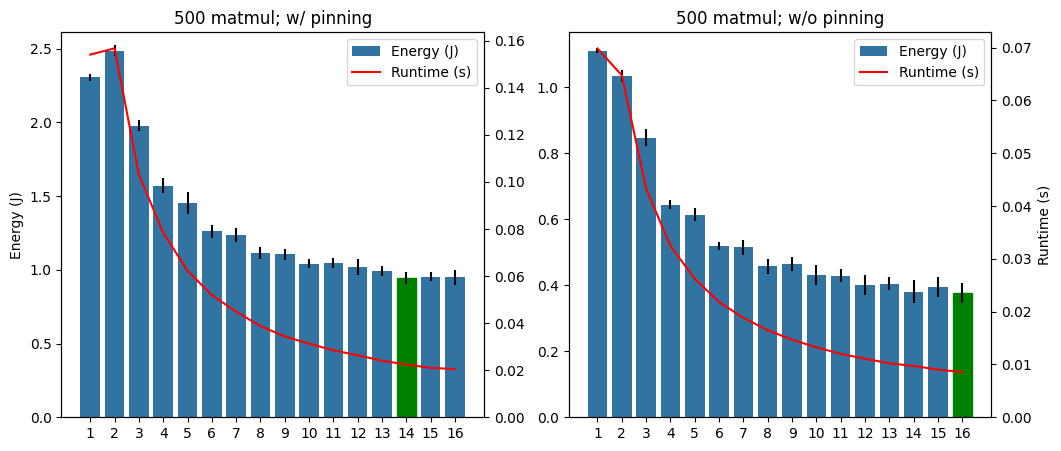

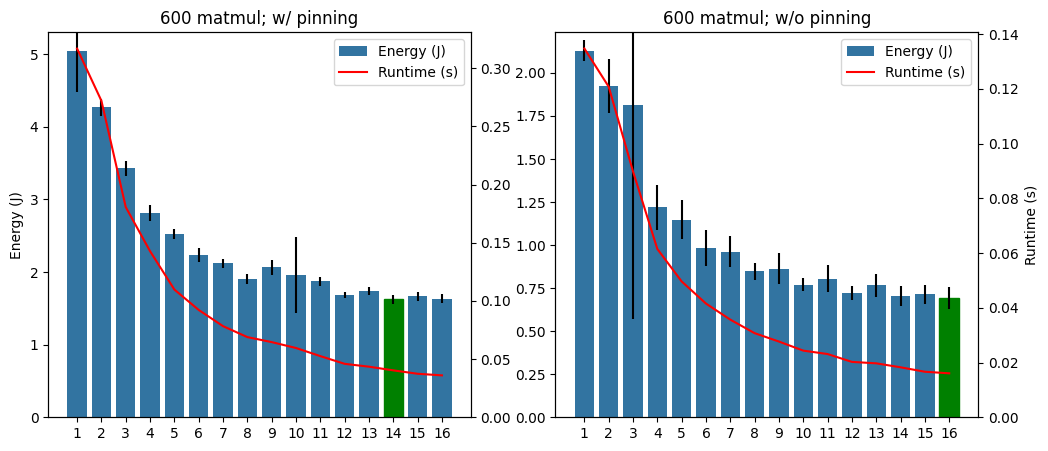

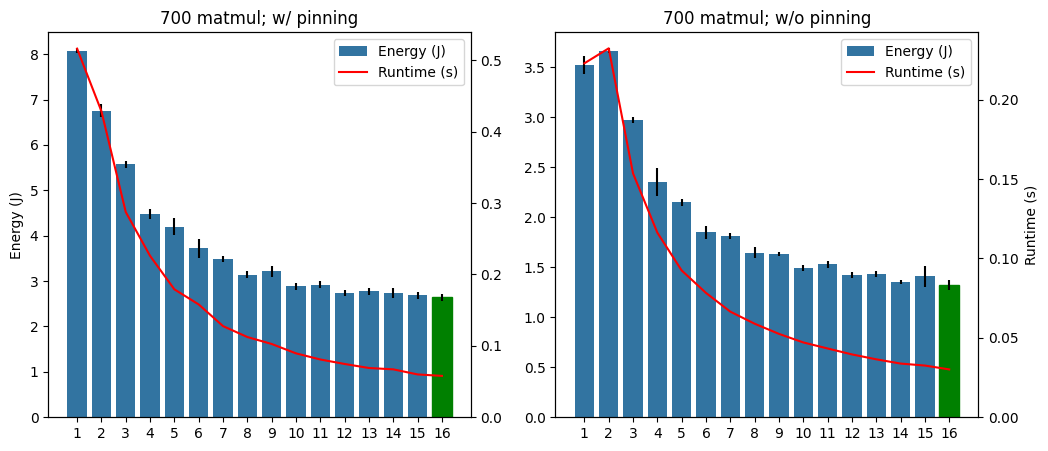

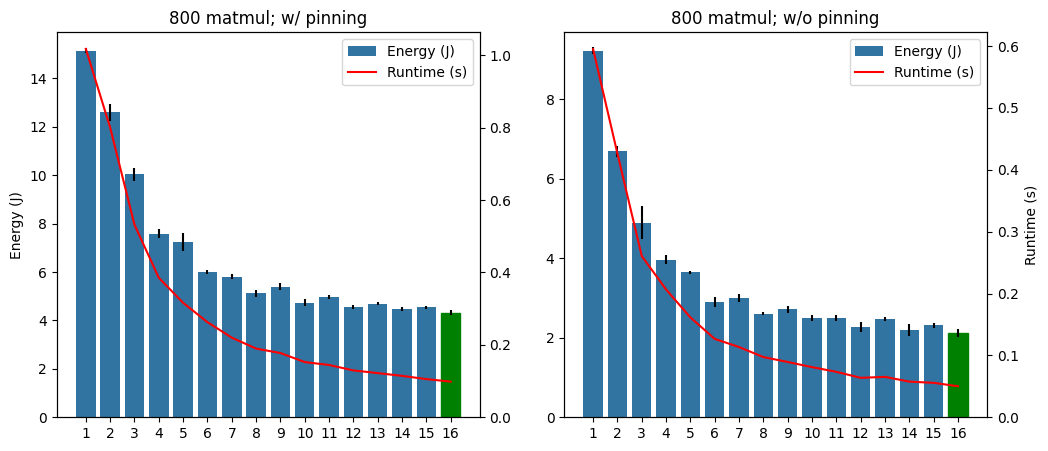

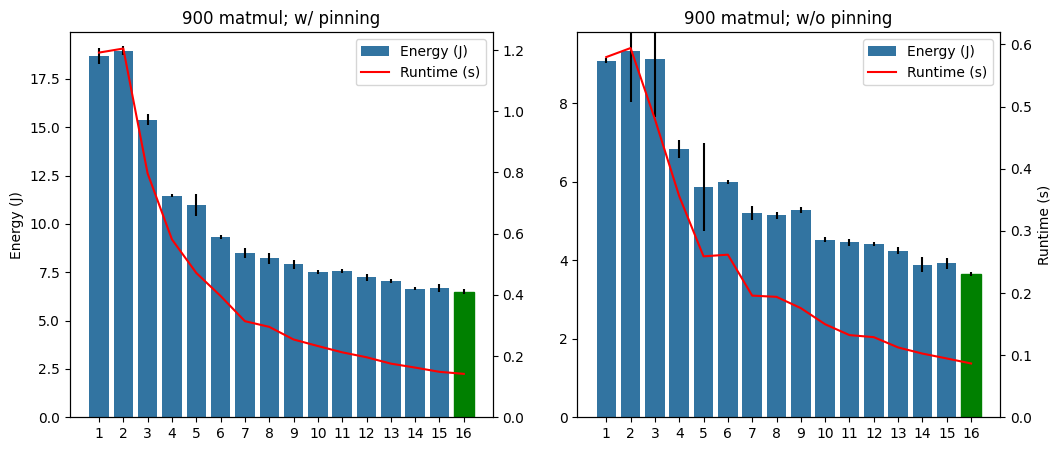

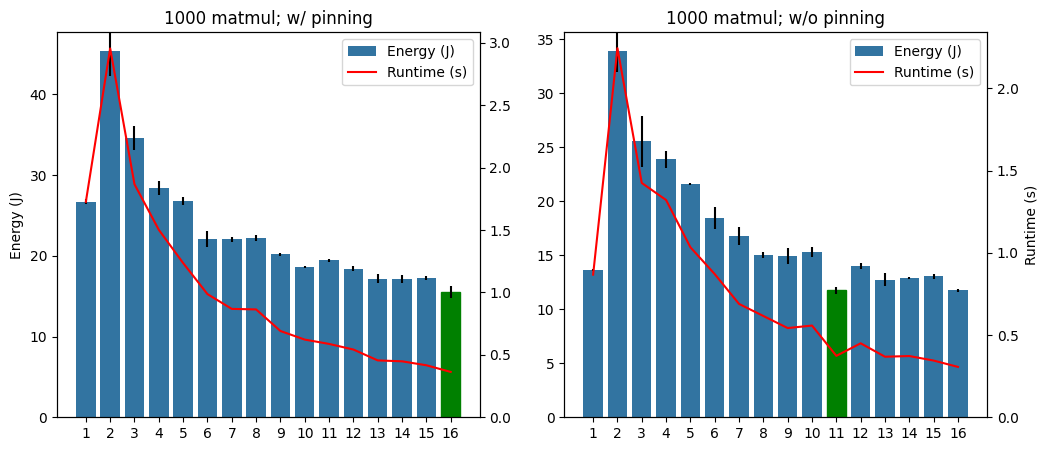

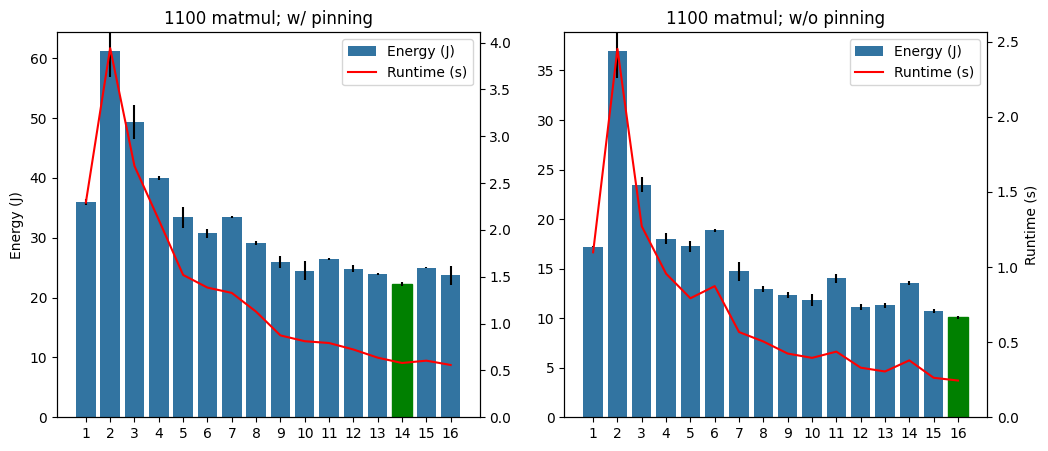

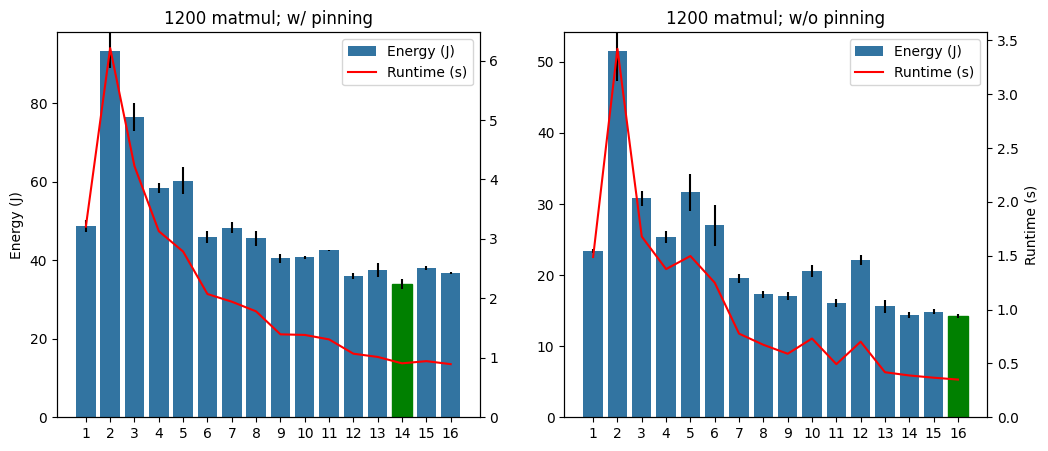

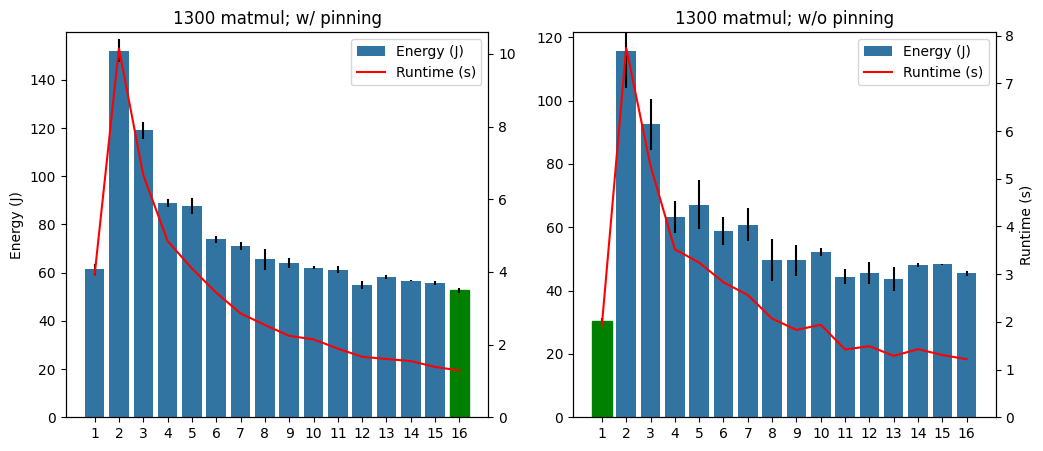

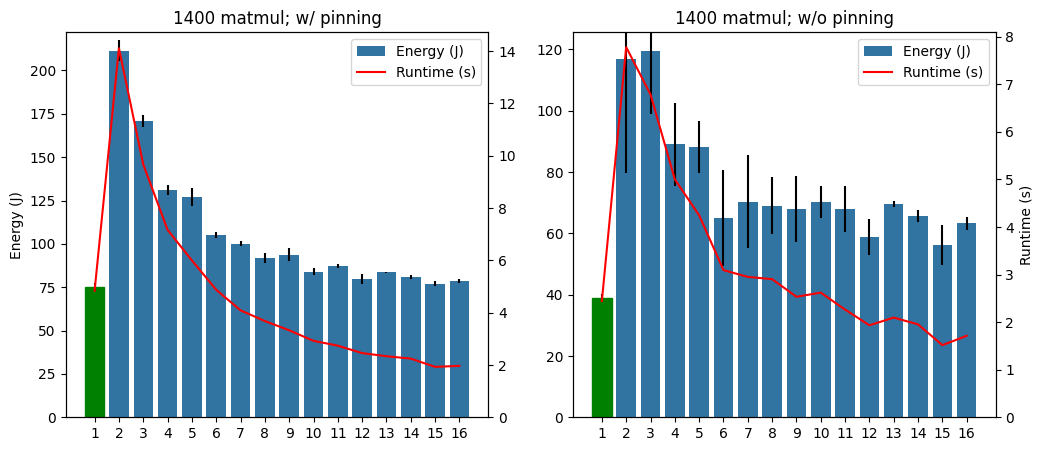

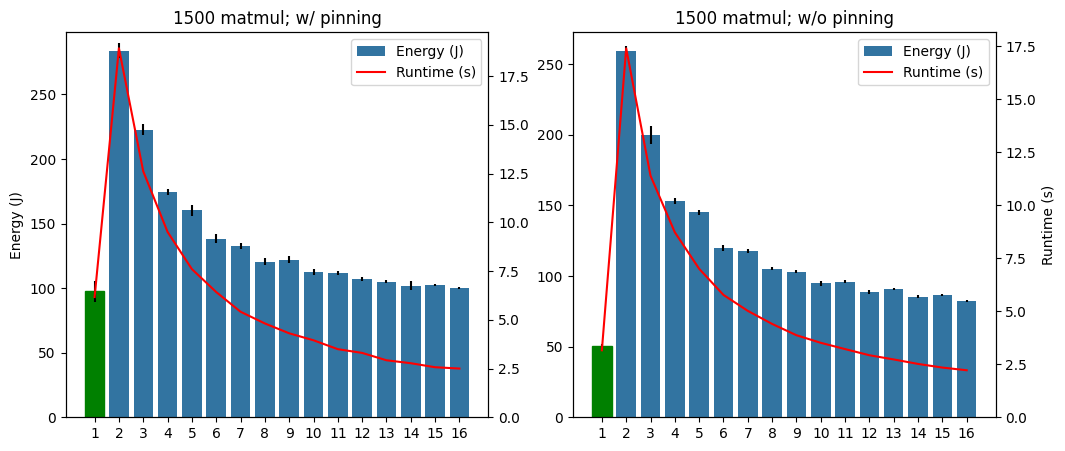

In [4]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size} {label}; w/ pinning')
    ax2.set_title(f'{size} {label}; w/o pinning')

plt.show()

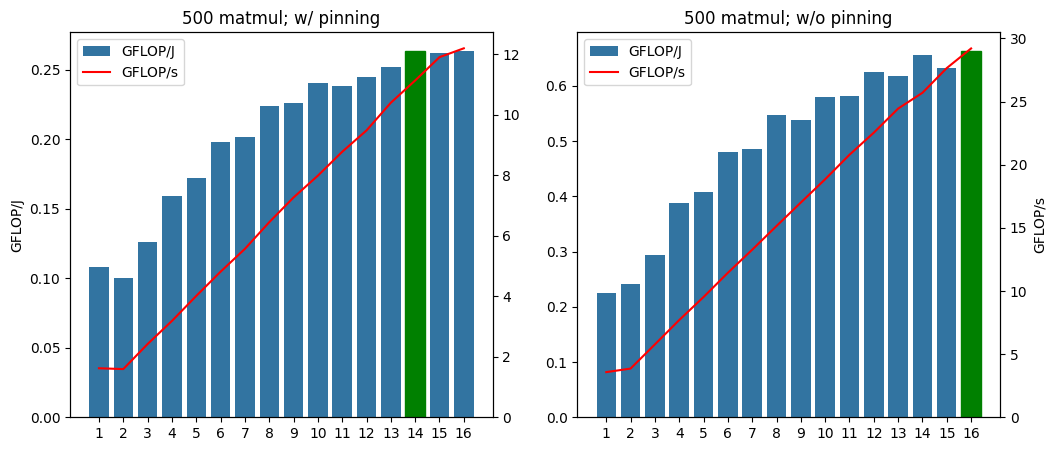

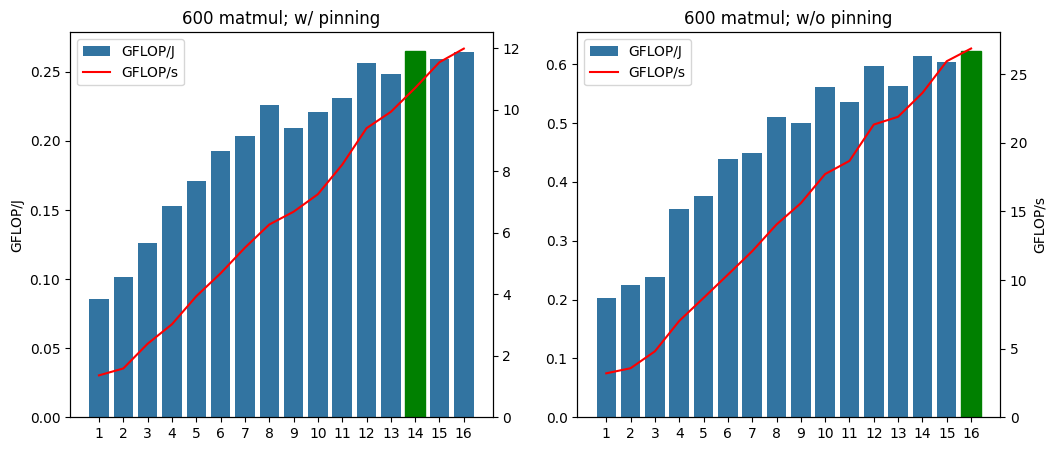

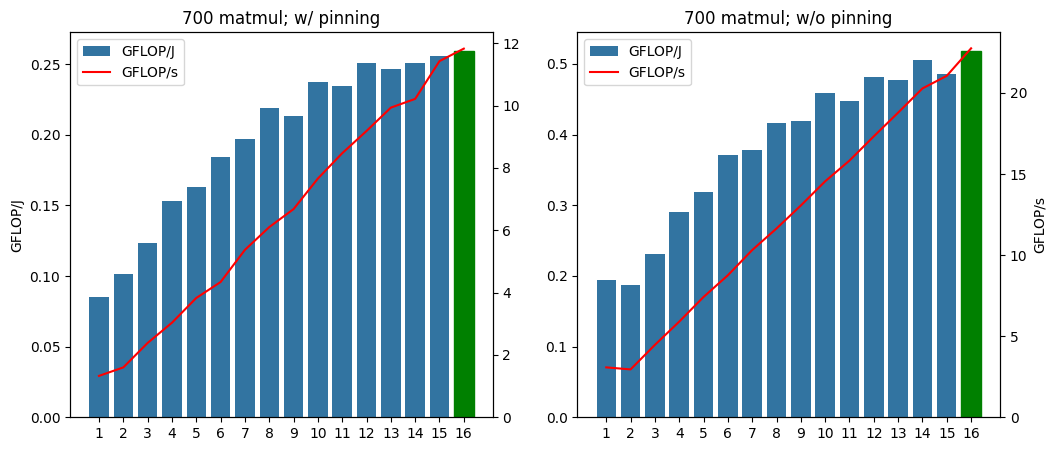

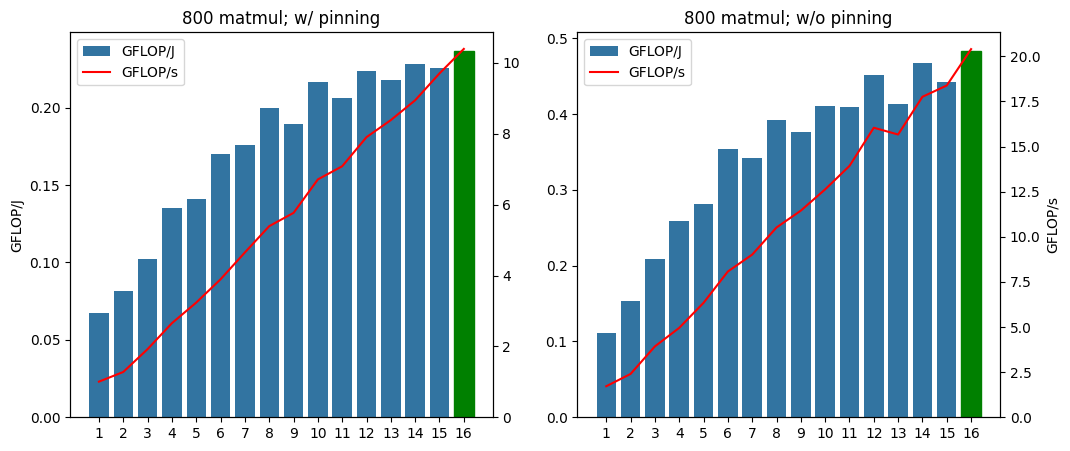

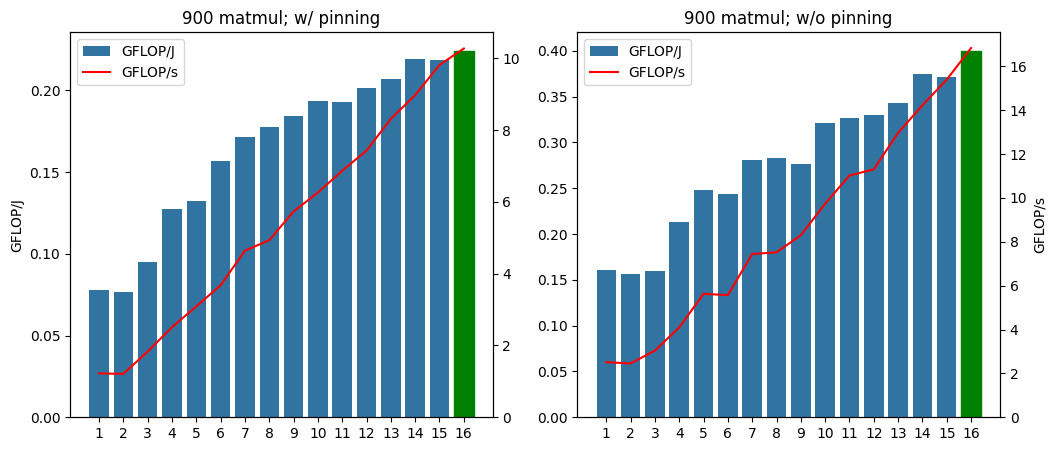

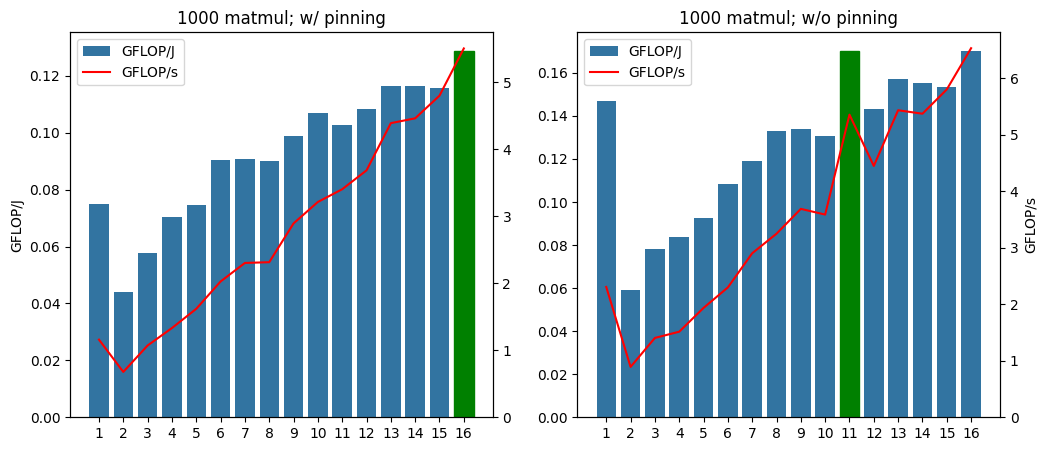

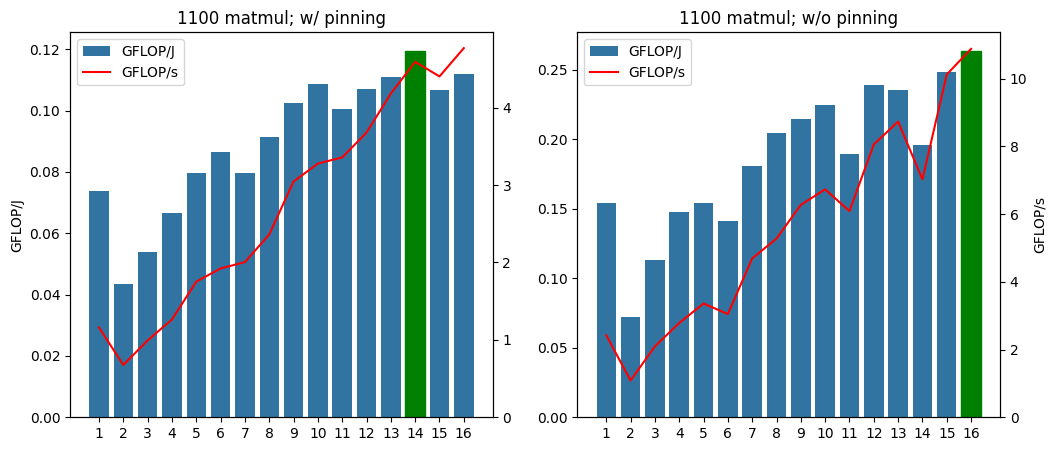

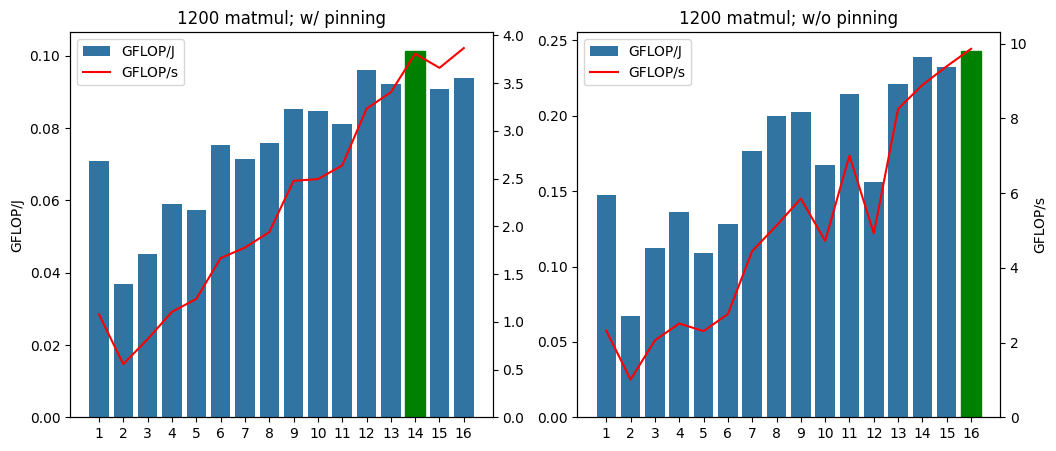

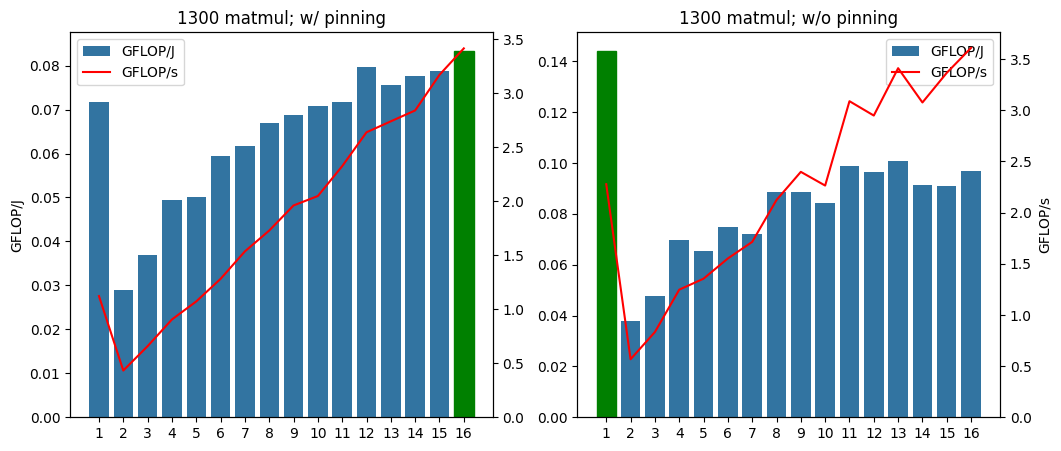

In [ ]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size} {label}; w/ pinning')
    ax2.set_title(f'{size} {label}; w/o pinning')

plt.show()